In [26]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings('ignore')
df = web.DataReader('FDS', data_source='stooq', start='01-01-2015')
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-27,342.88,345.9100,341.42,344.09,93072
2021-07-26,344.68,346.2300,340.71,342.75,125017
2021-07-23,342.44,346.1853,342.44,345.23,103690


<BarContainer object of 9 artists>

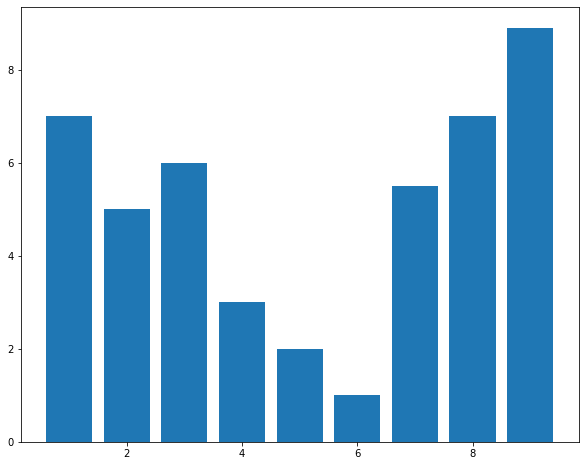

In [27]:
rcParams['figure.figsize']=10,8
x=range(1,10) # 1 to 9
y=[7, 5, 6, 3, 2,1,5.5,7,8.9]
plt.bar(x,y)

<BarContainer object of 9 artists>

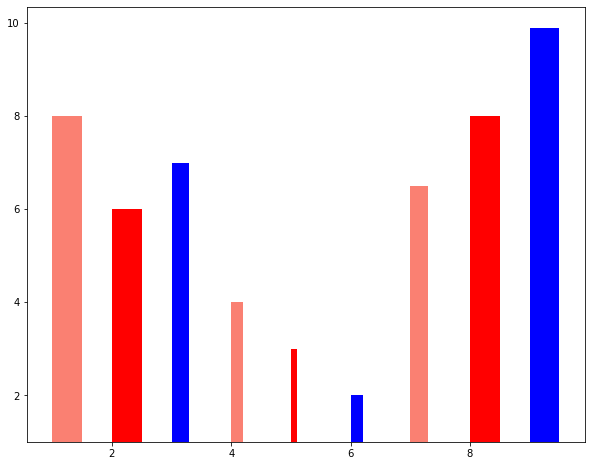

In [28]:
# change the width and colors etc
wide = [0.5, 0.5, 0.3, 0.2, 0.1, 0.2, 0.3,0.5, 0.5]
colour = ['salmon', 'red', 'blue']
plt.bar(x,y,width=wide, bottom=1, align='edge', color=colour)

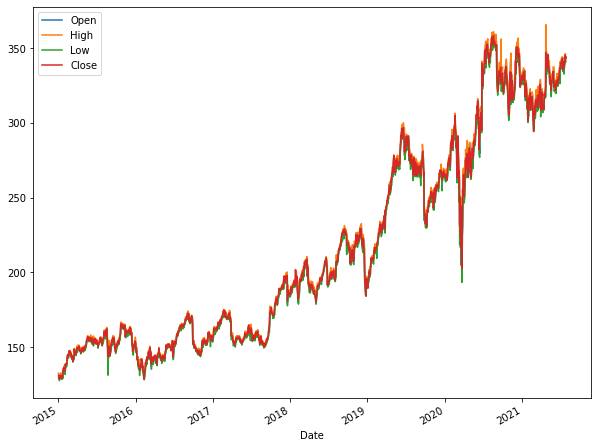

In [29]:
#lines
df_columes=['Open',	'High',	'Low',	'Close']
df[df_columes].plot()

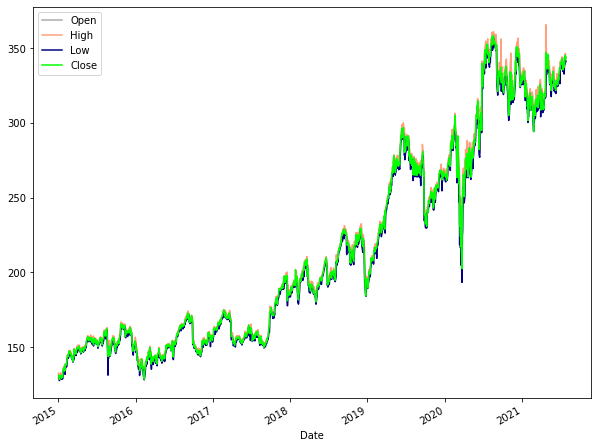

In [30]:
# change colors https://matplotlib.org/stable/gallery/color/named_colors.html
color_themes = ['darkgray', 'lightsalmon', 'navy', 'lime']
df[df_columes].plot(color=color_themes)

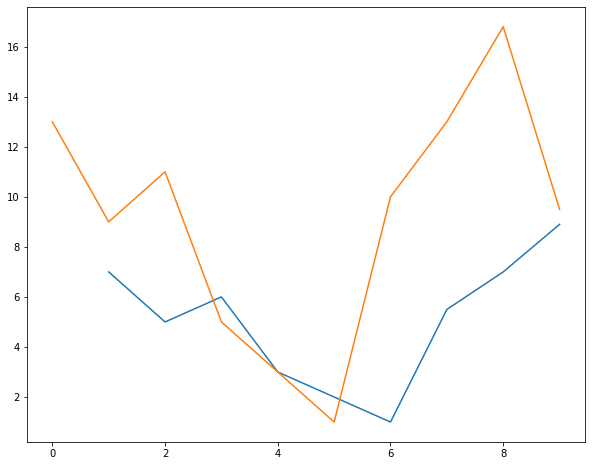

In [53]:
#add lines togather
x1 = range(0,10)
y1 = [2*w-1 for w in y]
y1.append(9.5)
y1
plt.plot(x,y)
plt.plot(x1,y1)

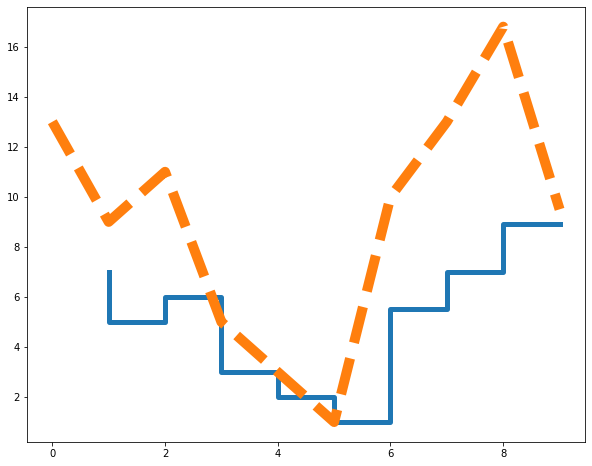

In [55]:
plt.plot(x,y,ds='steps',lw=5) #lw: line width
plt.plot(x1,y1,ls='--', lw=10)

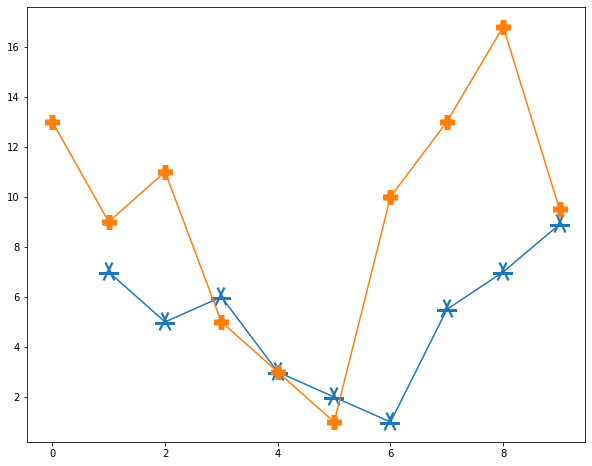

In [56]:
plt.plot(x,y,marker='1', mew=20) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(x1,y1,marker='+', mew=15)

([<matplotlib.patches.Wedge at 0x7fdd15465990>,
 [Text(1.0973204551560924, 0.07673212297353954, ''),
  Text(1.0573878634819256, 0.30320109854868443, ''),
  Text(0.8899186801919163, 0.6465637962687656, ''),
  Text(0.48220822315582645, 0.9886734696151712, ''),
  Text(-0.19101304755469664, 1.083288519123076, ''),
  Text(-0.8899187407275838, 0.646563712948563, ''),
  Text(-1.0573878315457172, -0.3032012099234539, ''),
  Text(-0.266113932210899, -1.0673253370379874, ''),
  Text(0.8899188012632436, -0.6465636296283541, '')])

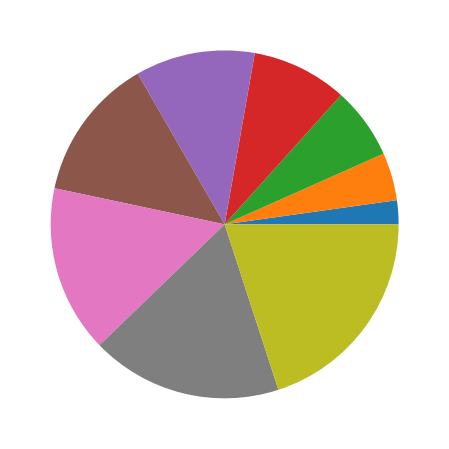

In [31]:
#pie
plt.pie(x)

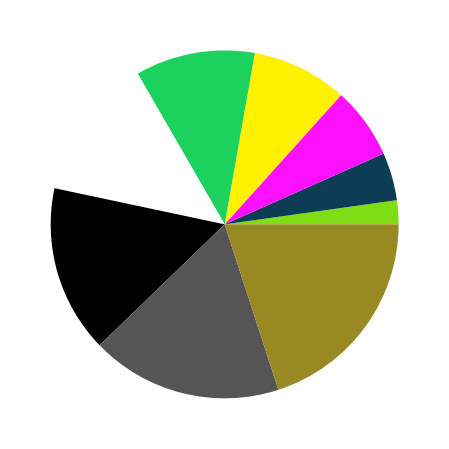

In [46]:
#change color
color_themes = ['#7fdd15', '#0d3d54', '#fd0fff', '#fff100', '#1dd15f', '#ffffff', '#000000', '#555555', '#988923']
plt.pie(x, colors=color_themes)
plt.show()

In [ ]:
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import cm
import matplotlib as mpl

In [ ]:
plt.rc('axes',axisbelow=True) #设置外观要求，即坐标轴置底
mpl.rcParams['animation.embed_limit'] = 2**128 #生成动画 动画默认的最大体积为20971520字节 调整生成的动画最大体积


In [ ]:
fig =plt.figure(figsize=(12,8), dpi=200)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)

df_temp = df.reset_index()
df_temp

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-08-06,3.536610,2.521120,2.831620,2.772120,1.643290e+05,2.772120
1,2015-08-07,2.798810,0.714725,2.793760,0.753325,6.741880e+05,0.753325
2,2015-08-08,0.879810,0.629191,0.706136,0.701897,5.321700e+05,0.701897
3,2015-08-09,0.729854,0.636546,0.713989,0.708448,4.052830e+05,0.708448
4,2015-08-10,1.131410,0.663235,0.708087,1.067860,1.463100e+06,1.067860
...,...,...,...,...,...,...,...
2121,2021-05-31,2739.737549,2531.160645,2707.560547,2633.518311,2.736322e+10,2633.518311
2122,2021-06-01,2801.392334,2555.401367,2634.456055,2706.125000,2.772327e+10,2706.125000
2123,2021-06-02,2891.254883,2667.684326,2708.376221,2855.126465,3.003821e+10,2855.126465
2124,2021-06-03,2857.165527,2562.637451,2857.165527,2688.195068,3.417384e+10,2688.195068


<Figure size 2400x1600 with 0 Axes>

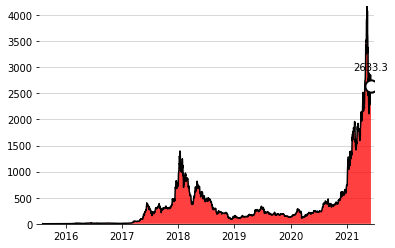

In [ ]:
plt.fill_between(df_temp.Date.values, y1=df_temp.Close.values, y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
plt.plot(df_temp.Date, df_temp.Close, color='k',zorder=2)
plt.scatter(df_temp.Date.values[-1], df_temp.Close.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
plt.text(df_temp.Date.values[-1], df_temp.Close.values[-1]*1.18,s=np.round(df_temp.Close.values[-1],1),size=10,ha='center', va='top')
plt.ylim(0, df_temp.Close.max())
# plt.xticks(ticks=df_temp.Date.values[0:Span+1:30],labels=df_temp.Date.values[0:Span+1:30],rotation=0)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')    # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)
plt.show()